# 2021/12/6
# 本代码绘制敏感性实验的流场以及和控制实验的差值
# 时间选择为23、24、25、26、27、28

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
'''设置绘图区域'''
lonmin,lonmax,latmin,latmax  =  40,120,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]
tmin,tmax  =  120,150 
level      =  925


#绘制长方形
verts = [[(90., 8.),(110.,8.), (110.,21.),(90., 21.),(0., 0.),],[(67., 4.),(90.,4.), (90.,25.),(67., 25.),(0., 0.),]]

codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY,]
props = dict(boxstyle='square', facecolor='white', alpha=1)

levs        =  [925]
time_slice  =  [22,24,25,26,27,28] 
pentad     =  [0,1,2,3,4,5]
pentads    =  ["p23","p24","p25","p26","p27","p28"]

path  =  "/home/sun/qomo-data/zhuang_plev/pentad_average/"
test  =  xr.open_dataset(path+"plev_pentad_con_U.nc")
u     =  xr.open_dataset(path+"plev_pentad_con_U.nc").sel(lev=levs[0],time=time_slice,lat=slice(-10,30),lon=slice(40,120))  #注意这里的time是从1开始的，所以21就是21侯
v     =  xr.open_dataset(path+"plev_pentad_con_V.nc").sel(lev=levs[0],time=time_slice,lat=slice(-10,30),lon=slice(40,120))
prect =  xr.open_dataset(path+"plev_pentad_con_prect.nc").sel(time=time_slice,lat=slice(-10,30),lon=slice(40,120))

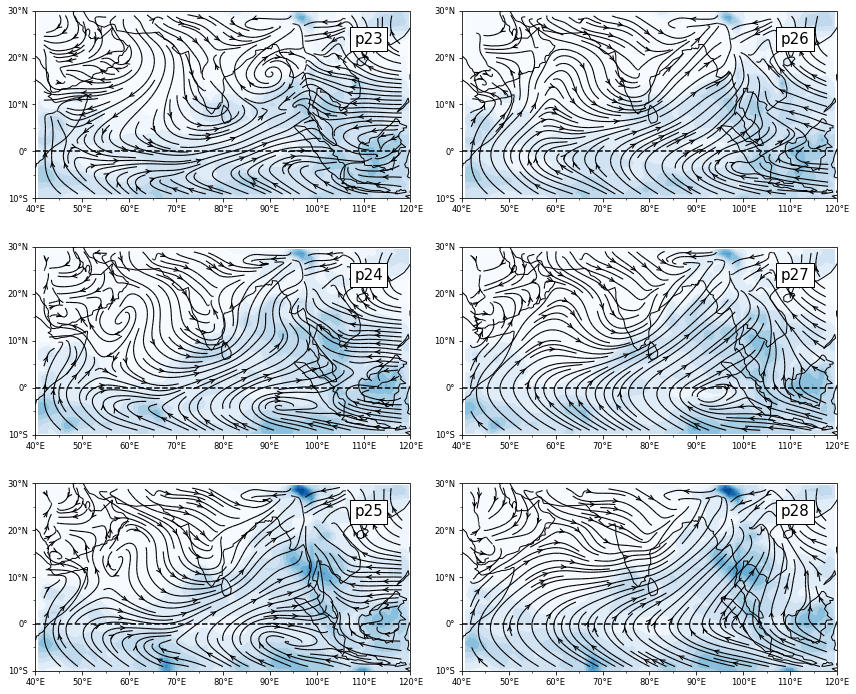

In [3]:
proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,10))
spec1   =  fig1.add_gridspec(nrows=3,ncols=2)

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            im  =  ax.contourf(prect.lon,prect.lat,prect.prect_pen.data[row,:],levels=np.arange(2,30,2),cmap='Blues',alpha=1,extend='both')
            ax.plot([40,120],[0,0],'k--')
            ax.streamplot(u.lon.data, u.lat.data, 
                          u.u_pen.data[pentad[j],:], v.v_pen.data[pentad[j],:], 
                          color='k',linewidth=1.1,arrowstyle='->',
                         density=1.5)
            ax.text(0.85,0.825,pentads[j],transform=ax.transAxes,bbox=props,fontsize=15)
        
            j += 1

    

plt.tight_layout()
plt.savefig("/home/sun/paint/lunwen/fig8_famil_con_stream_prect.pdf",dpi=1200)

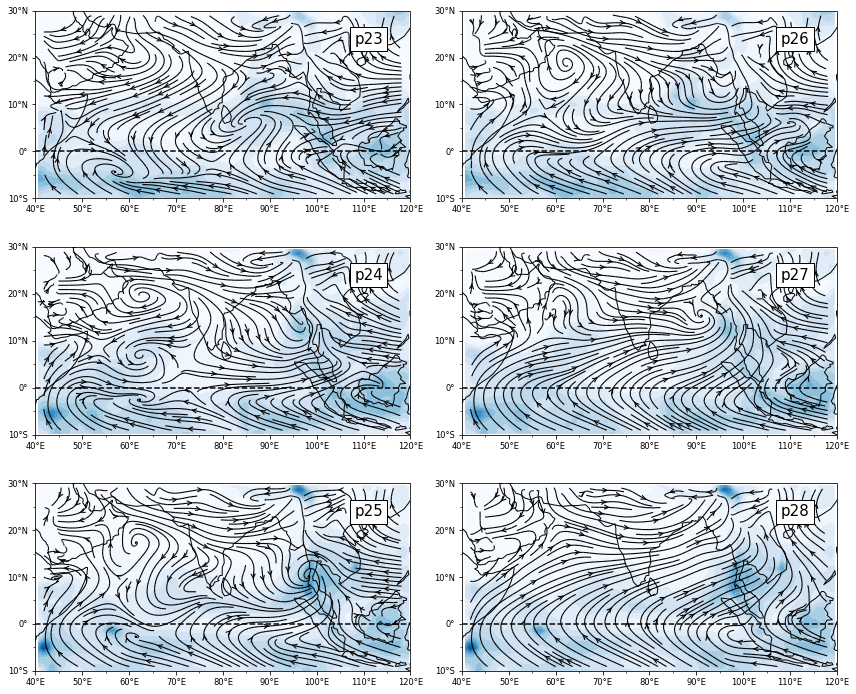

In [4]:
path  =  "/home/sun/qomo-data/zhuang_plev/pentad_average/"
test  =  xr.open_dataset(path+"plev_pentad_id_U.nc")
u     =  xr.open_dataset(path+"plev_pentad_id_U.nc").sel(lev=levs[0],time=time_slice,lat=slice(-10,30),lon=slice(40,120))  #注意这里的time是从1开始的，所以21就是21侯
v     =  xr.open_dataset(path+"plev_pentad_id_V.nc").sel(lev=levs[0],time=time_slice,lat=slice(-10,30),lon=slice(40,120))
prect =  xr.open_dataset(path+"plev_pentad_id_prect.nc").sel(time=time_slice,lat=slice(-10,30),lon=slice(40,120))

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,10))
spec1   =  fig1.add_gridspec(nrows=3,ncols=2)

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            im  =  ax.contourf(prect.lon,prect.lat,prect.prect_pen.data[row,:],levels=np.arange(2,30,2),cmap='Blues',alpha=1,extend='both')
            ax.plot([40,120],[0,0],'k--')
            ax.streamplot(u.lon.data, u.lat.data, 
                          u.u_pen.data[pentad[j],:], v.v_pen.data[pentad[j],:], 
                          color='k',linewidth=1.1,arrowstyle='->',
                         density=1.5)
            ax.text(0.85,0.825,pentads[j],transform=ax.transAxes,bbox=props,fontsize=15)
        
            j += 1

plt.tight_layout()
plt.savefig("/home/sun/paint/lunwen/fig9_famil_con_stream_prect.pdf",dpi=1200)